# Credit Card Fraud Detection

By [Rifky Aliffa](https://github.com/Penzragon)

## Introduction

### Dataset

The dataset used in this project is a credit card fraud detection dataset. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction `Amount`, this feature can be used for example-dependant cost-sensitive learning. Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise. The dataset is available at [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

### Objective

The objective of this project is to build an artificial neural network model which can predict the class of a transaction based on the principal components.

## Import Libraries

Libraries used in this project are **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, **Scikit-learn**, **TenforFlow**, and **Keras**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Data Loading

Load the dataset from `creditcard.csv` file as a DataFrame called `cc`.

In [2]:
cc = pd.read_csv('creditcard.csv')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

In [3]:
cc.shape

(284807, 31)

The dataset contains **284807** rows and **31** columns.

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From the basic information above we can see that the dataset does not contain any missing values and all the features are numerical including the target label `Class`.

In [5]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


It looks like `Time` and `Amount` columns were not scaled, so we need to scale them later in the **data preprocessing** section.

## Data Cleaning

### Missing Value Check

In [6]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see, the dataset **does not contain** any missing values.

### Duplicated Data Check

In [7]:
cc.duplicated().any()

True

In [8]:
cc.duplicated().sum()

1081

The dataset contains **1081 duplicated data**. Next we need to remove the duplicated data.

In [9]:
cc = cc.drop_duplicates()

In [10]:
cc.duplicated().any()

False

In [11]:
cc.shape

(283726, 31)

After removing the duplicated data, the dataset contains **284806** rows.

## Exploratory Data Analysis (EDA)

### Class Column (Target Label)

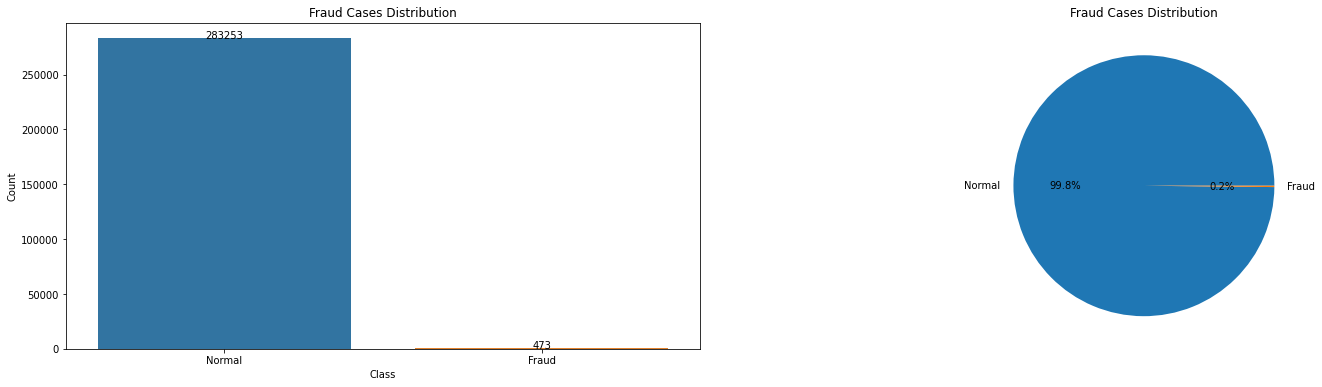

In [12]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='Class', data=cc)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Fraud Cases Distribution')
plt.xlabel('Class')
fig.set_xticklabels(['Normal', 'Fraud'])
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cc.Class.value_counts(), labels=['Normal', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraud Cases Distribution')
plt.show()

### Time Column

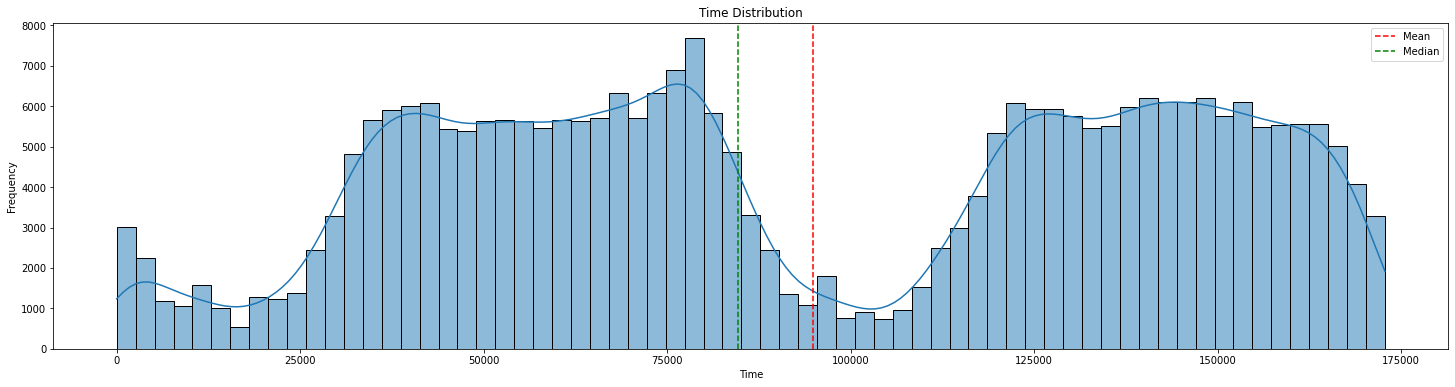

In [13]:
plt.figure(figsize=(25, 6))
sns.histplot(x='Time', data=cc, kde=True)
plt.axvline(cc.Time.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(cc.Time.median(), color='g', linestyle='--', label='Median')
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Amount Column

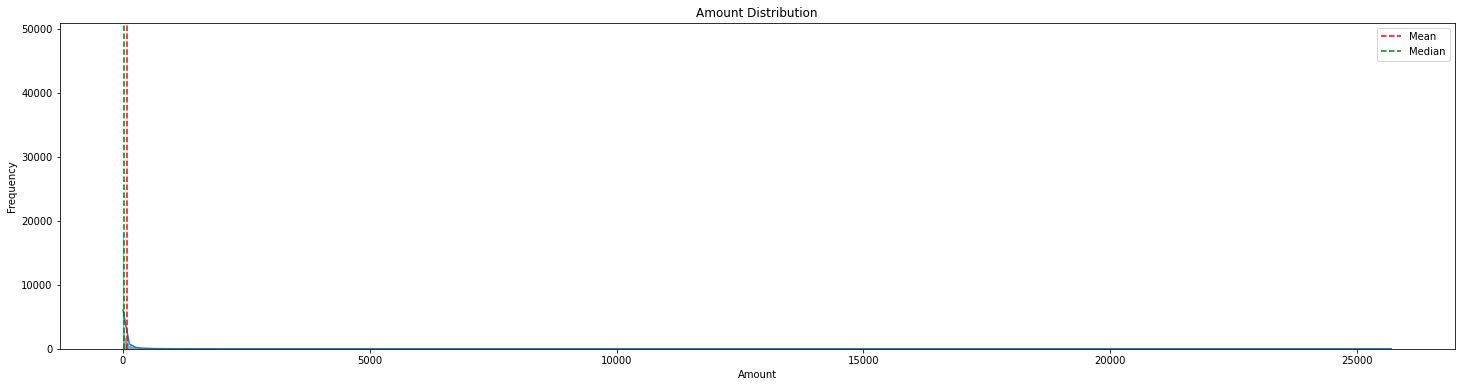

In [14]:
plt.figure(figsize=(25, 6))
sns.histplot(x='Amount', data=cc, kde=True)
plt.axvline(cc.Amount.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(cc.Amount.median(), color='g', linestyle='--', label='Median')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Data Preprocessing

### Data Splitting

Before we start building the model, we need to split the dataset into **training**, **validation**, and **test** datasets.

In [15]:
df_train_val, df_test = train_test_split(cc, test_size=0.1, random_state=23, stratify=cc.Class)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.Class)

In [16]:
# Training set
X_train = df_train.drop(columns=['Class'])
y_train = df_train.Class

# Validation set
X_val = df_val.drop(columns=['Class'])
y_val = df_val.Class

### Data Scaling

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Create Tensorflow Input Pipeline

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(23)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(23)

## Model Definition

In this section we will define the artificial neural network model.

In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

## Model Training

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
8882/8882 [==============================] - 49s 5ms/step - loss: 0.0070 - auc: 0.9012 - val_loss: 0.0036 - val_auc: 0.9349
Epoch 2/10
8882/8882 [==============================] - 47s 5ms/step - loss: 0.0040 - auc: 0.9340 - val_loss: 0.0037 - val_auc: 0.9292
Epoch 3/10
8882/8882 [==============================] - 47s 5ms/step - loss: 0.0040 - auc: 0.9385 - val_loss: 0.0036 - val_auc: 0.9350
Epoch 4/10
8882/8882 [==============================] - 47s 5ms/step - loss: 0.0033 - auc: 0.9492 - val_loss: 0.0047 - val_auc: 0.9350
Epoch 5/10
8882/8882 [==============================] - 48s 5ms/step - loss: 0.0032 - auc: 0.9477 - val_loss: 0.0038 - val_auc: 0.9350
Epoch 6/10
8882/8882 [==============================] - 48s 5ms/step - loss: 0.0030 - auc: 0.9552 - val_loss: 0.0042 - val_auc: 0.9350
Epoch 7/10
8882/8882 [==============================] - 48s 5ms/step - loss: 0.0029 - auc: 0.9596 - val_loss: 0.0044 - val_auc: 0.9350
Epoch 8/10
8882/8882 [==============================] -

## Model Evaluation

In [23]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,auc,val_loss,val_auc
0,0.006964,0.901169,0.003630,0.934934
1,0.003983,0.934049,0.003684,0.929161
2,0.003960,0.938499,0.003624,0.935018
3,0.003324,0.949195,0.004656,0.935035
4,0.003231,0.947699,0.003845,0.934982


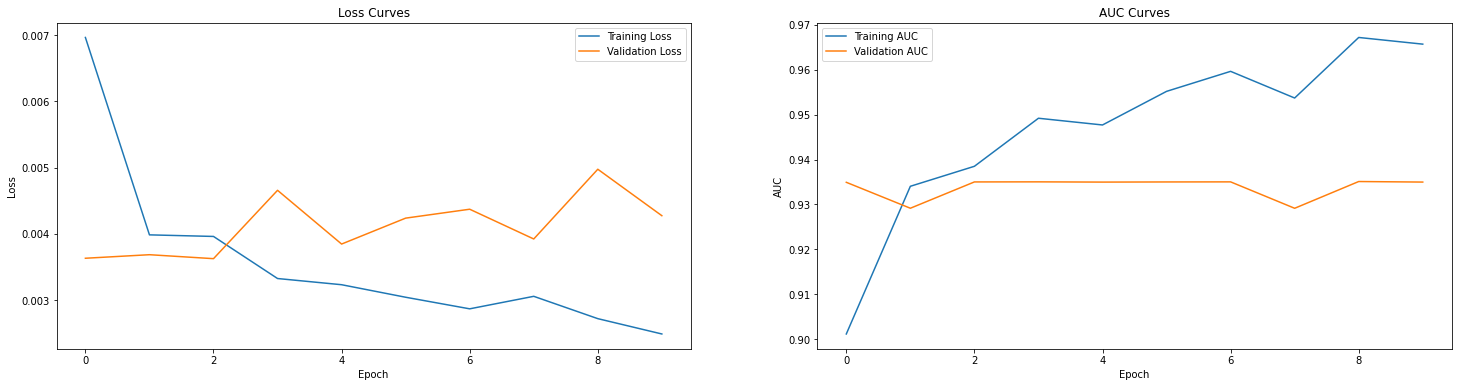

In [24]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.loss, label='Training Loss')
plt.plot(metrics.val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics.auc, label='Training AUC')
plt.plot(metrics.val_auc, label='Validation AUC')
plt.title('AUC Curves')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [25]:
train_conf = confusion_matrix(y_train, model.predict(X_train).round())
val_conf = confusion_matrix(y_val, model.predict(X_val).round())

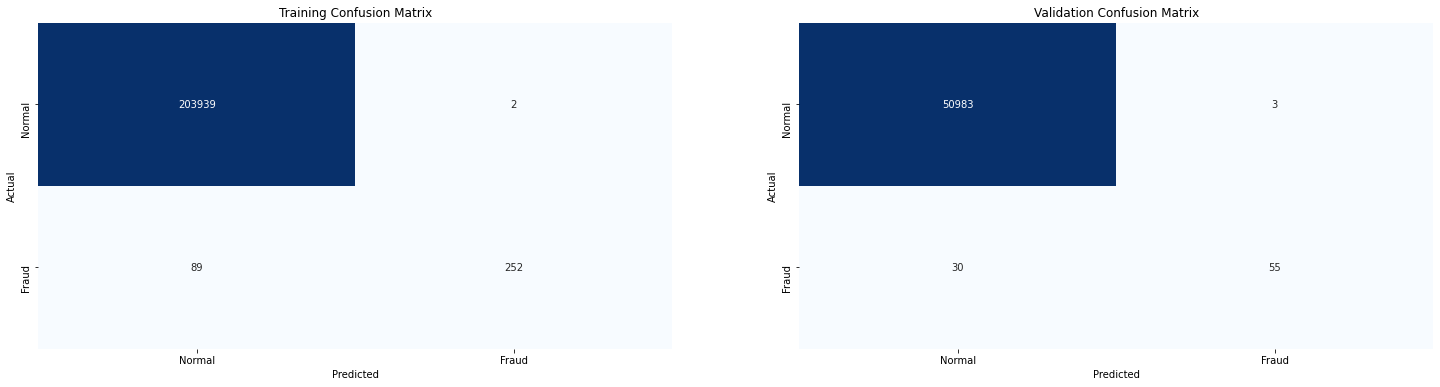

In [26]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.heatmap(train_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
fig.set_xticklabels(['Normal', 'Fraud'])
plt.ylabel('Actual')
fig.set_yticklabels(['Normal', 'Fraud'])
plt.subplot(1, 2, 2)
fig = sns.heatmap(val_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
fig.set_xticklabels(['Normal', 'Fraud'])
plt.ylabel('Actual')
fig.set_yticklabels(['Normal', 'Fraud'])
plt.show()

In [27]:
print(classification_report(y_train, model.predict(X_train).round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203941
           1       0.99      0.74      0.85       341

    accuracy                           1.00    204282
   macro avg       1.00      0.87      0.92    204282
weighted avg       1.00      1.00      1.00    204282



## Model Improvement

In [29]:
undersampler = RandomUnderSampler(sampling_strategy='majority')

In [30]:
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [32]:
y_train_under.value_counts()

0    341
1    341
Name: Class, dtype: int64

In [33]:
model_under = Sequential()
model_under.add(Dense(128, activation='relu', input_shape=(X_train_under.shape[1],)))
model_under.add(Dropout(0.2))
model_under.add(Dense(64, activation='relu'))
model_under.add(Dropout(0.2))
model_under.add(Dense(32, activation='relu'))
model_under.add(Dropout(0.2))
model_under.add(Dense(1, activation='sigmoid'))

In [34]:
model_under.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [36]:
under_dataset = tf.data.Dataset.from_tensor_slices((X_train_under, y_train_under)).batch(23)

In [37]:
# Compile the model
model_under.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history_under = model_under.fit(under_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
30/30 [==============================] - 6s 202ms/step - loss: 0.6429 - auc: 0.9540 - val_loss: 0.0045 - val_auc: 0.9338
Epoch 2/10
30/30 [==============================] - 6s 223ms/step - loss: 0.2327 - auc: 0.9822 - val_loss: 0.0192 - val_auc: 0.9751
Epoch 3/10
30/30 [==============================] - 6s 217ms/step - loss: 0.1462 - auc: 0.9877 - val_loss: 0.0576 - val_auc: 0.9769
Epoch 4/10
30/30 [==============================] - 7s 226ms/step - loss: 0.1200 - auc: 0.9873 - val_loss: 0.0903 - val_auc: 0.9769
Epoch 5/10
30/30 [==============================] - 6s 213ms/step - loss: 0.1409 - auc: 0.9852 - val_loss: 0.0784 - val_auc: 0.9774
Epoch 6/10
30/30 [==============================] - 6s 200ms/step - loss: 0.1259 - auc: 0.9860 - val_loss: 0.0707 - val_auc: 0.9764
Epoch 7/10
30/30 [==============================] - 6s 206ms/step - loss: 0.1262 - auc: 0.9874 - val_loss: 0.0799 - val_auc: 0.9765
Epoch 8/10
30/30 [==============================] - 7s 242ms/step - loss: 0.

In [39]:
metrics_under = pd.DataFrame(history_under.history)
metrics_under.head()

,loss,auc,val_loss,val_auc
0,0.642893,0.954030,0.004484,0.933768
1,0.232728,0.982198,0.019163,0.975149
2,0.146171,0.987676,0.057572,0.976897
3,0.120025,0.987337,0.090339,0.976908
4,0.140932,0.985178,0.078425,0.977363


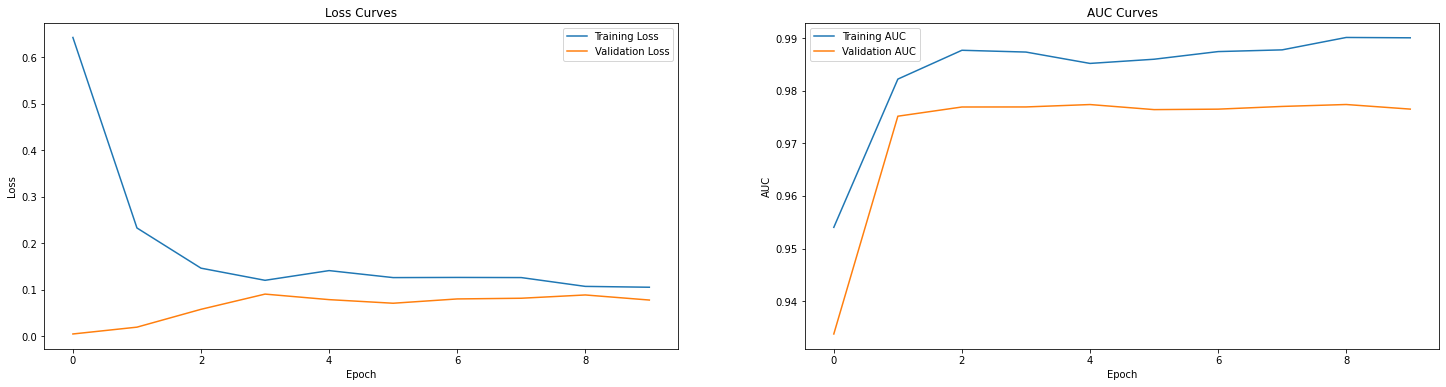

In [40]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics_under.loss, label='Training Loss')
plt.plot(metrics_under.val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics_under.auc, label='Training AUC')
plt.plot(metrics_under.val_auc, label='Validation AUC')
plt.title('AUC Curves')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [38]:
print(classification_report(y_train_under, model_under.predict(X_train_under).round()))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       341
           1       0.99      0.94      0.97       341

    accuracy                           0.97       682
   macro avg       0.97      0.97      0.97       682
weighted avg       0.97      0.97      0.97       682



In [41]:
train_conf_under = confusion_matrix(y_train_under, model_under.predict(X_train_under).round())
val_conf_under = confusion_matrix(y_val, model_under.predict(X_val).round())

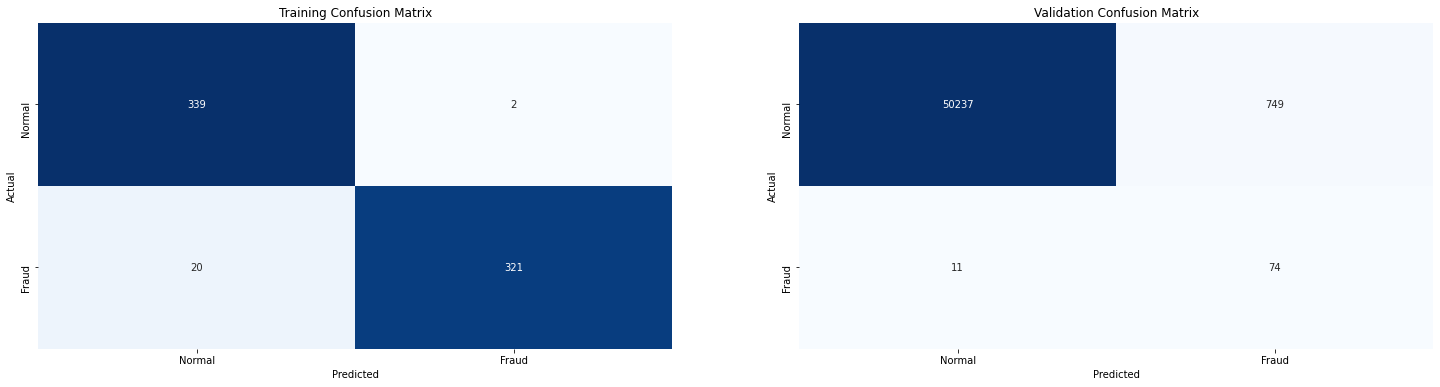

In [42]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.heatmap(train_conf_under, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
fig.set_xticklabels(['Normal', 'Fraud'])
plt.ylabel('Actual')
fig.set_yticklabels(['Normal', 'Fraud'])
plt.subplot(1, 2, 2)
fig = sns.heatmap(val_conf_under, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
fig.set_xticklabels(['Normal', 'Fraud'])
plt.ylabel('Actual')
fig.set_yticklabels(['Normal', 'Fraud'])
plt.show()